In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv("C:/Users/LICT/Downloads/EDA1-master/EDA1-master/titanic_train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df['Age'].fillna(df['Age'].median(), inplace=True)

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Exploratory data Analysis


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()

In [8]:
correlation_matrix

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.034212,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500
Age,0.034212,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688
SibSp,-0.057527,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000


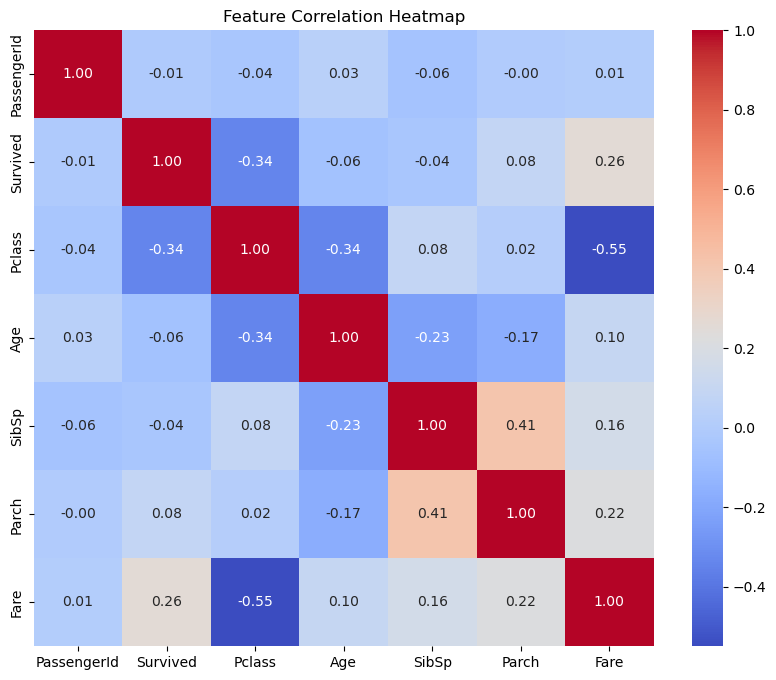

In [9]:
plt.figure(figsize=(10,8)) #Adjust the size of the plot
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

# This heatmap visualizes the correlation matrix we discussed earlier, showing the relationships between pairs of variables in color-coded format. Here’s a detailed breakdown of what this plot represents:

Color Scale
The color scale on the right indicates the strength and direction of the correlations:
Red shades: Positive correlations, where lighter reds indicate weak positive correlations and darker reds indicate stronger positive correlations.
Blue shades: Negative correlations, where lighter blues indicate weak negative correlations and darker blues indicate stronger negative correlations.
White or close to white: Near-zero correlation, indicating little or no linear relationship between the variables.
Observations
Survived and Pclass: There’s a darker blue cell at the intersection of Survived and Pclass, showing a negative correlation of about -0.34. This indicates that passengers in lower classes (Pclass with higher values) had a lower chance of survival.

Survived and Fare: The cell for Survived and Fare shows a light red color, with a correlation of around 0.26. This suggests that passengers who paid higher fares had a slightly higher chance of survival.

Pclass and Fare: The cell for Pclass and Fare shows a strong blue color, indicating a strong negative correlation (-0.55). This suggests that lower-class passengers generally paid lower fares, as expected.

Pclass and Age: The correlation between Pclass and Age is also negative (-0.34), shown in a light blue color, indicating that younger passengers were generally in higher classes.

SibSp and Parch: The light red cell for SibSp and Parch (0.41) indicates a moderate positive correlation, meaning that passengers with siblings/spouses on board often also had parents/children with them.

Other Variables:

PassengerId shows very low correlation with other variables, as expected, since it's likely just a unique identifier.
Most variables, other than those mentioned, have low correlation with each other, shown by white or very light cells.
Interpretation
This heatmap makes it easy to visually identify relationships between variables. Stronger correlations (both positive and negative) stand out with more vibrant colors, making it easier to detect key patterns, such as the negative relationship between Survived and Pclass, and the positive relationship between Survived and Fare.

This plot is useful for selecting features for further analysis, as features with stronger correlations to Survived may be more relevant in predicting survival.

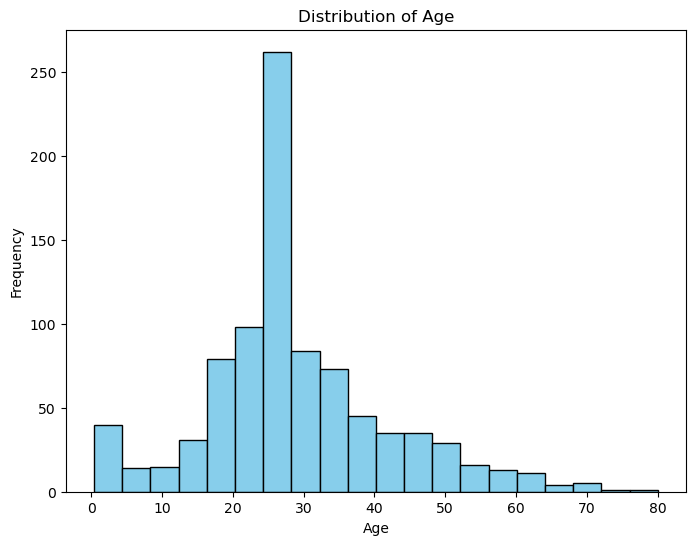

In [10]:
# Histogram for the age column

plt.figure(figsize=(8,6))
plt.hist(df['Age'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

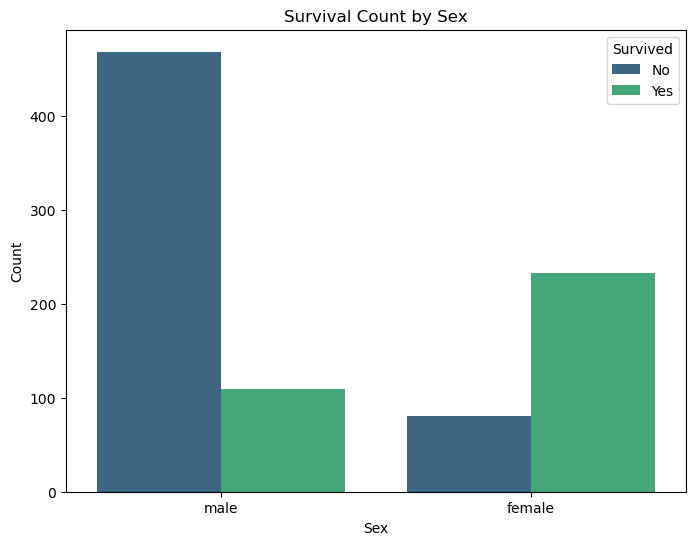

In [11]:
# Bar Plot for Categorical Columns
# For example, comparing the number of survivors by gender

plt.figure(figsize=(8,6))
sns.countplot(data=df, x='Sex', hue='Survived', palette='viridis')
plt.title("Survival Count by Sex")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.legend(title="Survived", labels=["No", "Yes"])
plt.show()


# Building and Training a Model (Using Linear Regression)

# Steps in Developing a Model
1. Define the target and features:

*Target variable: Survived.
*Features: Select relevant ones like Age, Fare, Pclass, Sex, etc.

In [12]:
# Splitting the data into training and testing sets:
from sklearn.model_selection import train_test_split

In [13]:
# Separate features (x) and target (y)
x = df.drop(columns=['Name', 'Ticket', 'Cabin', 'Survived']) # Meaning x= all columns except 'Survied'==Features

y = df['Survived'] # The target column 'Survived'== Target

x = pd.get_dummies(x, columns=['Sex', 'Embarked'], drop_first=True)

In [14]:
# Split the data into training and testing sets (80% training, 20% testing)

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

#test_size = 0.2, Specifies that 20% of the data will be used for testing, and 80% will be used for training.
#random_state= 42, sets a random state ensuring reproducibility, so every time you run this code, you get the same split. 

In [15]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

Since we're predicting a binary outcome (survived or not), a logistic regression model is more appropriate than linear regression.

Linear Regression: Used for regression tasks (predicting continuous values). The output is a continuous number, like predicting temperature, salary, or height.It uses a linear function to model the relationship between the input variables (features) and the output variable. It assumes a linear relationship. The goal is to minimize the Mean Squared Error (MSE) between predicted and actual values.

Logistic Regression: Used for classification tasks (predicting categorical outcomes). The output is a probability between 0 and 1, which represents the likelihood of a certain class, typically converted into binary classes (e.g., 0 or 1) based on a threshold (often 0.5). Uses the logistic (sigmoid) function to model the probability of belonging to a class, transforming the linear combination of features into a probability. Minimizes the Log-Loss (Cross-Entropy Loss), which is suitable for probabilistic outputs.

Applications
Linear Regression: Useful for predicting continuous quantities, such as house prices, sales amounts, or exam scores.
Logistic Regression: Ideal for binary classification tasks, such as spam vs. non-spam emails, disease diagnosis (positive/negative), and customer churn prediction (churn/no-churn).

# Linear Regression Formular 

Y = β0 + β1X1 + β2X2 +... + βnXn + ϵ

# Logistic Regression Formular

P(Y=1)= 1/[1+e{to the power} −(β0+β1X1+β2X 2+...+βnXn)]

This formula maps any input to a value between 0 and 1.

# TRAINING A MODEL

In [16]:
#To train a model, you need to use the training data to help the model learn the relationship between the features (like Pclass, Age, Fare, etc.) and the target variable (Survived). This process is called "fitting the model".

Step 1:  Import the Model 

In [17]:
#Let's use a simple model called Logistic Regression.
from sklearn.linear_model import LogisticRegression


Step 2: Create an Instance of the Model

In [18]:
model = LogisticRegression()

Step 3: Fit the Model to Your Training Data

The fit method is used to train the model on the training data (X_train and y_train), where:

X_train contains the features (like Age, Pclass, etc.).
y_train contains the target variable (Survived), indicating whether each passenger survived.

In [19]:
model.fit(x_train, y_train)


C:\Users\LICT\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Evaluating a Model

In [20]:
# To evaluate your model, you’ll want to measure its performance using "accuracy, precision, and recall". These metrics give you insights into how well the model is predicting survival.

Step 1: Make Predictions on the Test Data
After training the model, use it to make predictions on the test data (X_test).

In [21]:
y_pred = model.predict(x_test)


Step 2: Calculate Accuracy, Precision, and Recall
These metrics can be calculated using the functions in sklearn.metrics.

1. Accuracy: The proportion of correct predictions (both survived and not survived) out of the total predictions.
2. Precision: The proportion of correctly predicted survivors out of all predicted survivors. This is important if you care about the "correctness" of positive predictions (i.e., survivors).
3. Recall: The proportion of actual survivors that were correctly predicted. This is important if you want to make sure you’re not missing too many actual survivors.

In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

#Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

#Calculate precision
precision = precision_score(y_test, y_pred)

#Calculate recall
recall = recall_score(y_test, y_pred)

In [23]:
# Print results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.776536312849162
Precision: 0.7575757575757576
Recall: 0.6756756756756757


# What Accuracy, Precision, and Recall Mean

Let’s go through each metric with simple definitions and examples:

1. Accuracy: This is the percentage of correct predictions out of all predictions. It tells you how often the model is right overall.

Accuracy=Correct Predictions/Total Predictions
 
Example: If there were 100 people and the model correctly predicted 80 of them, then the accuracy would be 80%.

2. Precision: This metric focuses on the positive predictions (in this case, those predicted to survive). Precision tells you, out of all the people the model predicted as "survived," how many actually did survive.

Precision =True Positives/[True Positives + False Positives]
 
Example: If the model predicted 50 people would survive, but only 40 actually did, then precision would be 40 / 50 = 0.8 (or 80%). Precision is useful when you want to know the "quality" of the positive predictions.

3. Recall: This metric tells you, out of all the actual survivors, how many the model correctly predicted as "survived." It measures how well the model catches the true positives.

Recall= True Positives/[True Positives + False Negatives]
 
Example: If there were 60 actual survivors and the model correctly identified 40 of them, then recall would be 40 / 60 = 0.67 (or 67%). Recall is useful when you want to minimize missed survivors.

Interpreting Your Results
= 
With your results:

1. Accuracy: 0.78 (78%)

The model was correct about 78% of the time on the test data. This means that out of all the passengers, the model correctly predicted survival or non-survival for about 78%.

2. Precision: 0.76 (76%)

When the model predicted a passenger would survive, it was correct about 76% of the time. This indicates decent precision, so the model does a fairly good job of predicting actual survivors correctly but isn’t perfect.

3. Recall: 0.68 (68%)

Out of all the actual survivors, the model successfully identified 68%. This is lower than precision, which means the model missed some actual survivors (it predicted them as "did not survive" instead).

Summary of What These Results Mean
=
78% accuracy suggests the model performs reasonably well overall.
76% precision indicates the model is fairly reliable when it predicts someone will survive, but there’s still a chance of error.
68% recall shows that the model is missing some actual survivors in its predictions, which could be improved if catching survivors is critical.
In a real-world scenario, you might adjust the model if you want a higher recall (catching as many survivors as possible) or a higher precision (fewer false survivor predictions).

# Step 4: Look at Model Coefficients
The coefficients in logistic regression tell you how each feature affects the probability of survival. Positive coefficients mean that an increase in the feature is associated with a higher chance of survival, while negative coefficients  higher values of this feature are associated with a lower chance of survival.





Coefficient meaning;
=
A coefficient in the context of machine learning (and particularly in regression models like linear or logistic regression) is a number that represents the relationship between a feature (input variable) and the target (output variable). In a simple sense, it tells us how much influence a feature has on the prediction.

In [24]:
# Print model coefficients

feature_names = x.columns
coefficients = model.coef_[0]

for feature, coef in zip(feature_names, coefficients):
    print(f"{feature}: {coef:.4f}")

PassengerId: 0.0007
Pclass: -0.5855
Age: -0.0202
SibSp: -0.1798
Parch: -0.0687
Fare: 0.0069
Sex_male: -2.2004
Embarked_Q: -0.0390
Embarked_S: 0.2460


# Improving the Model


To create new features, also known as feature engineering, one could combine or transform existing features to help the model better understand relationships in the data. In this case, creating a FamilySize feature by combining SibSp (number of siblings/spouses aboard) and Parch (number of parents/children aboard) might give the model extra context about family size, which could be helpful in predicting survival.

# Steps to Create the FamilySize Feature
1. Combining the SibSp and Parch to calculate the size of each passenger's family.
2. Adding 1 to include the passenger themselves in the family size count.

In [26]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
# + 1 includes the passenger themselves in the family size.

What the FamilySize Feature Represents
=
If FamilySize is 1, the passenger was traveling alone (no family members aboard).
Higher FamilySize values represent passengers traveling with more family members.

Since FamilySize now combines the information from SibSp and Parch, then let's drop those individual columns to avoid redundancy.

In [27]:
df = df.drop(columns=['SibSp','Parch'])

# Example of Using FamilySize in the Model
After adding the new feature, we can therefore include FamilySize in the model training as we would with any other feature. Here’s a quick example:

In [28]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,1


In [29]:
# Include FamilySize in your features and drop the original columns
X = df.drop(columns=['Name', 'Ticket', 'Cabin', 'Survived'])
X = pd.get_dummies(X, columns=['Sex', 'Embarked'], drop_first=True)

# Proceed with the split and model training as before


In [30]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,1


# Regularization
Regularization helps prevent overfitting by adding a penalty for large coefficients, which discourages the model from relying too heavily on any single feature.

Logistic regression offers L1 (Lasso) and L2 (Ridge) regularization:

1. L2 (Ridge): Penalizes large coefficients by squaring them, pushing all coefficients toward zero but not necessarily making them zero.
2. L1 (Lasso): Shrinks some coefficients to exactly zero, effectively removing less important features from the model.

To add regularization in scikit-learn’s LogisticRegression, you can use the penalty and C parameters.

Imagine you're trying to make a prediction using some data, like predicting someone’s height based on their age, weight, and shoe size. You use a model to do this, and the model tries to find the best values (or coefficients) for each factor (age, weight, shoe size) to get as close as possible to the real height.

But here’s the problem: if your model tries too hard to fit your data, it might end up focusing on every tiny detail, even the random noise or quirks in your data. This is called overfitting. It’s like learning the answers to a specific test but not really understanding the material, so when a new test comes up, the model doesn’t do well.

To avoid overfitting, we can use regularization—a way to tell the model, “Don’t overthink it!” We do this by adding a small penalty if the model uses large values for the coefficients. Think of it as encouraging the model to “stay simple.”

There are two main types of regularization:

1. 1. L1 Regularization (Lasso)
This method makes the model try to set some of the coefficients (the factors, like age or shoe size) to exactly zero. If the model thinks a factor doesn’t help with predictions, it will ignore it completely by setting its coefficient to zero.
Why use Lasso? Imagine you have 10 different factors, but maybe only 3 of them really matter. L1 regularization (Lasso) will naturally ignore the unimportant ones, which simplifies your model and makes it easier to interpret.
Think of it like packing for a trip: Lasso helps you only take the essentials. Anything not important is left out entirely.

2. L2 Regularization (Ridge)
This method also discourages large coefficients, but instead of setting them to zero, it just makes them smaller. It says, “All factors can be used, but let’s not rely too heavily on any single one.”
Why use Ridge? If you believe every factor has some role (even if it’s small), L2 regularization (Ridge) will keep everything in, but with smaller, more balanced values.
It’s like a gentle reminder for the model not to go overboard with any one factor.

How They Help:
L1 (Lasso): Helps by selecting only the most important factors (feature selection).
L2 (Ridge): Helps by shrinking the impact of factors, so the model generalizes better.

Sometimes people combine both methods, which is called "Elastic Net". It’s a bit like mixing both approaches: setting some factors to zero (L1) and shrinking others (L2) to get the best of both worlds.

In [31]:
from sklearn.linear_model import LogisticRegression

# Create a logistic regression model with L2 regularization (default)
# Set C (inverse of regularization strength) to control regularization intensity

model =LogisticRegression(penalty='12', C=1.0, random_state=42)




C parameter: Smaller values of C (e.g., 0.1, 0.01) make the regularization stronger, reducing the chance of overfitting.
penalty='l2': Uses L2 regularization. For L1 regularization, use penalty='l1' with solver='liblinear'.

# Cross-Validation

Cross-validation involves splitting the data into multiple parts (folds) and training/testing the model on different combinations of these folds. This process provides a better estimate of model performance and helps ensure it generalizes well to new data.

The most common type is k-fold cross-validation, where the data is split into k subsets, and the model is trained on k-1 subsets and tested on the remaining subset. This process repeats k times, each time with a different test subset.

Here’s how to apply cross-validation with scikit-learn:

In [32]:
from sklearn.model_selection import cross_val_score

# Set up logistic regression with regularization (using L2 here)
model = LogisticRegression(penalty='l2', C=1.0, random_state=42)

# Perform 5-fold cross-validation on the model
# cv=5 means the data will be split into 5 folds
scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

# Print out the accuracy for each fold and the average accuracy
print("Cross-validation scores for each fold:", scores)
print("Average cross-validation accuracy:", scores.mean())


Cross-validation scores for each fold: [0.75418994 0.80337079 0.7752809  0.78651685 0.81460674]
Average cross-validation accuracy: 0.786793045006591


C:\Users\LICT\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\LICT\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

# Full Code Summary

C:\Users\LICT\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\LICT\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

Accuracy: 0.7921348314606742
Precision: 0.7162162162162162
Recall: 0.7681159420289855
Cross-validation scores for each fold: [0.7752809  0.78651685 0.78089888 0.76966292 0.83050847]
Average cross-validation accuracy: 0.7885736050276138
Pclass: -1.1312
Age: -0.0407
SibSp: -1.4660
Parch: -1.1323
Fare: 0.0034
FamilySize: 1.0780
Sex_male: -2.7315
Embarked_Q: 0.0573
Embarked_S: 0.0693


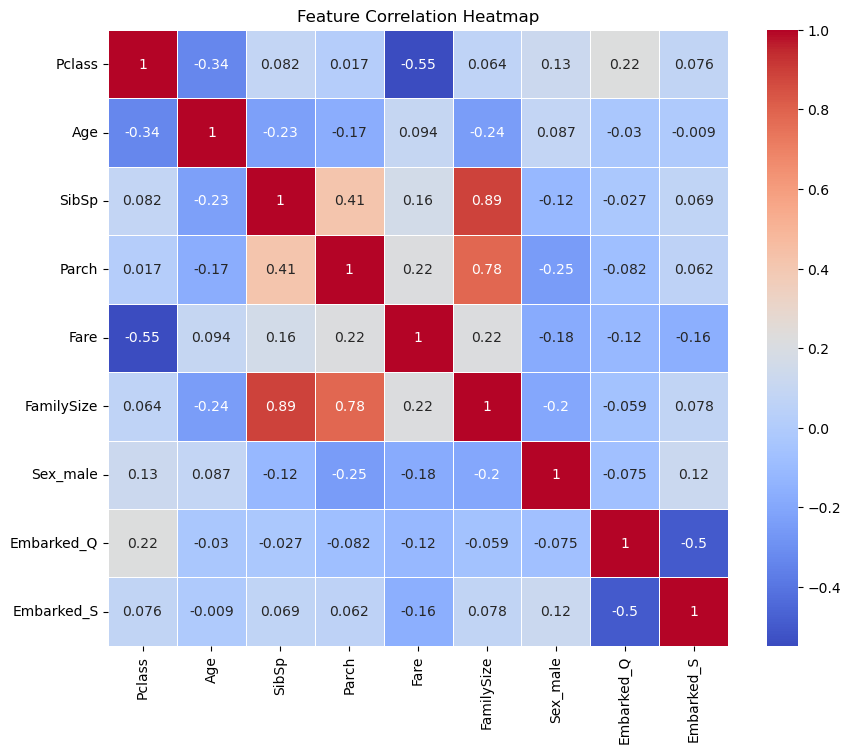

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load and clean the data
df=pd.read_csv("C:/Users/LICT/Downloads/EDA1-master/EDA1-master/titanic_train.csv")
df = df.drop(columns=['Name', 'Ticket', 'Cabin'])
df['Age'].fillna(df['Age'].median(), inplace=True)
df.dropna(subset=['Embarked'], inplace=True)

# Feature engineering
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

# Define features and target
X = df.drop(columns=['Survived', 'PassengerId'])
y = df['Survived']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LogisticRegression(penalty='l2', C=1.0, random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

# Cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print("Cross-validation scores for each fold:", cv_scores)
print("Average cross-validation accuracy:", cv_scores.mean())

# Coefficients
feature_names = X.columns
coefficients = model.coef_[0]
for feature, coef in zip(feature_names, coefficients):
    print(f"{feature}: {coef:.4f}")

# Optional: Visualize correlations with a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()
